# Sequential Model-Based Optimization(SMBO) Method

What is the sequential model-based optimization method?

Sequential model-based optimization (SMBO) is a powerful method for hyperparameter tuning in ML algorithms. It uses a probabilistic model (surrogate model) to predict the performance of different combinations of hyperparameters based on previously evaluated configurations or combinations. The probabilistic model is then used to suggest the next combination of hyperparameters to evaluate the performance of the ML model and determine whether it produces better results or not

The goal of this method is to cut down on the number of evaluations needed to find the best solution or the best combination of hyperparameters that produces the best results. For example, instead of doing 20 
 evaluations to find the best combination of hyperparameters to get the best results, this method might only requi10 
10
 evaluations or less to find the best combination of hyperparameters. This can save a significant amount of time and the resources necessary for computation.

At a high level, Bayesian optimization methods are effective due to the fact that they select the next combination of hyperparameters in an informed manner. By using past evaluations and updating a probabilistic model at each iteration, the algorithm selects combinations of hyperparameters that have the highest probability of producing good 

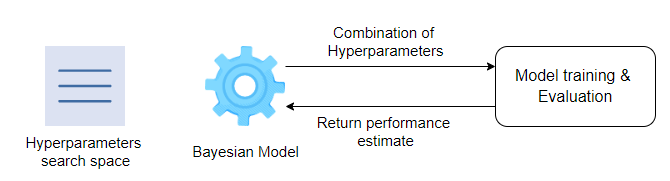

The above illustration shows how the SMBO method selects a combination of hyperparameter values.

One of the key benefits of SMBO is that it allows the algorithm to focus its evaluations on the most promising hyperparameter combinations. This differs from the grid search method or random search method learned in previous lessons. The grid or random search methods tend to evaluate every combination of hyperparameters in the search space, regardless of how promising they are likely to be.

By focusing on the most promising hyperparameters, the SMBO method can significantly reduce the number of evaluations required to find an optimal solution or the best combination of hyperparameters to produce the best resu

Benefits of SMBO : 

SMBO efficiently selects and evaluates hyperparameters for ML models by updating its probabilistic internal model based on promising outcomes, thus saving computational resources.

SMBO can also strike a balance between exploring new hyperparameters and exploiting those with potential, facilitated by its probabilistic model. This enables a comprehensive search of the hyperparameter space and avoids suboptimal outcomes.

SMBO is a powerful and successful technique for tuning hyperparameters in ML algorithms. By utilizing probabilistic models to predict the performance of different hyperparameter combinations, SMBO significantly reduces the number of evaluations required to find the optimal solution. This method has been widely adopted and appreciated by ML practitioners and data scientists due to its ability to save time and resources while simultaneously improving algorithm perform
ance.lts.results..

# 1.1. Import Important packages
First, we import important Python packages that will do the following tasks:

Load the dataset.
Clean the dataset.
Process the dataset using feature engineering techniques.
Create and train machine learning model (logistic regression).
Check machine learning model performance.
Implement the grid search method.
Identify combination of hyperparameters that provide the best results.

In [ ]:
# import important modules
import numpy as np
import pandas as pd

# sklearn modules
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

# 1.2 : load the Dataset and perform EDA

In [ ]:
# load data
data_path = "loan_data_set.csv"

data = pd.read_csv(data_path)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 13)

In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 1.3 : Check for missing values

In [ ]:
round(100*(data.isnull().sum()/(len(data.index))),2)

,0
Loan_ID,0.00
Gender,2.12
Married,0.49
Dependents,2.44
Education,0.00
Self_Employed,5.21
ApplicantIncome,0.00
CoapplicantIncome,0.00
LoanAmount,3.58
Loan_Amount_Term,2.28


In [ ]:
data['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [ ]:
data['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [ ]:
# replace with numerical values
data['Dependents'].replace('3+', 3,inplace=True)
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# handle the missing data
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# drop the ID column
data = data.drop('Loan_ID',axis=1)

In [ ]:
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


# 1.4 : Evaluate class distribution

In [ ]:
data.Loan_Status.value_counts()

,count
Loan_Status,
1,422
0,192


# 1.5. Split Feature and Target variables

In [ ]:
#split features and target from  data
X = data.drop('Loan_Status',axis = 1)
y = data.Loan_Status.values

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [ ]:
X.Credit_History.value_counts()

,count
Credit_History,
1.0,525
0.0,89


# 1.6. Preprocess the features
However, before we train the machine learning model, we need to transform our features into numerical values so that the machine learning model can understand the data. In this case, we will use:

The MinMaxScaler() method from scikit-learn to scale the minimum and maximum values to be 0 and 1, respectively, for the columns with int64 and float64 data types.
The get_dummies() method from pandas to convert categorical variables into indicator variables. These variables will have a value of 0 or 1. This method can automatically identify categorical variables and convert them into indicator variables with a value of 0 or 1.

In [ ]:
# scale the numerical columns with MinMaxScaler()
X["ApplicantIncome"] = MinMaxScaler().fit_transform(X["ApplicantIncome"].values.reshape(-1,1))
X["LoanAmount"] = MinMaxScaler().fit_transform(X["LoanAmount"].values.reshape(-1,1))
X["CoapplicantIncome"] = MinMaxScaler().fit_transform(X["CoapplicantIncome"].values.reshape(-1,1))
X["Loan_Amount_Term"] = MinMaxScaler().fit_transform(X["Loan_Amount_Term"].values.reshape(-1,1))

# change categorical features to numerical with get_dummies()
X = pd.get_dummies(X)

# convert the DataFrame to a NumPy array.
X = X.to_numpy()

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.070489,0.0,0.172214,0.74359,1.0,False,True,True,False,False,True,False,False,True,False,True,False,False,False,True
1,0.05483,0.036192,0.172214,0.74359,1.0,False,True,False,True,False,False,True,False,True,False,True,False,True,False,False
2,0.03525,0.0,0.082489,0.74359,1.0,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True
3,0.030093,0.056592,0.160637,0.74359,1.0,False,True,False,True,False,True,False,False,False,True,True,False,False,False,True
4,0.072356,0.0,0.191027,0.74359,1.0,False,True,True,False,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.0,0.089725,0.74359,1.0,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False
610,0.04893,0.0,0.044863,0.358974,1.0,False,True,False,True,True,False,False,False,True,False,True,False,True,False,False
611,0.097984,0.00576,0.353111,0.74359,1.0,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True
612,0.091936,0.0,0.257598,0.74359,1.0,False,True,False,True,False,False,False,True,True,False,True,False,False,False,True


# 1.7. Train a base machine learning model
In this example, we will train the histogram-based gradient boosting algorithm with default hyperparameter values using the Cross-validation technique to check the model performance.

In [ ]:
# import important modules
import numpy as np
import pandas as pd

# sklearn modules
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

In [ ]:
# create a classifier
histogram_classifier = HistGradientBoostingClassifier(random_state=442)

We will use the cross_val_score() method from scikit-learn to train and evaluate a machine learning model across numerous folds of the dataset. This cross-validation method provides a more comprehensive understanding of the model’s performance across the entire dataset than a simple train/test split.

To use cross_val_score() method, we need to define the following parameters:

estimator: The machine learning model object to fit the data
X: The data/features to fit the machine learning model on
y: The target variable of the model classification or regression tasks
scoring: The evaluation error metric to use
cv: The number of splits to use (example 3).
The main goal is to prevent model over-fitting and promote model generalization.

Note: The machine learning model’s performance will be evaluated using the f1_score evaluation metric. We use f1_score because we have an unequal number of classes in the Loan_Status variable.

In [ ]:
# define a function to evaluate f1_score
def f1_scorer(estimator, X, y):
    y_preds = estimator.predict(X)
    f1 = f1_score(y, y_preds, average='macro')
    return round(f1, 4)

In [ ]:
# implement and run the cross_val_score method
score = cross_val_score(estimator=histogram_classifier,
                        X=X,
                        y=y,
                        scoring=f1_scorer,
                        cv=3,
                        n_jobs=-1)

# print the mean score
print(round(score.mean(), 4))

0.71


Our machine learning model achieved an F1-score of 0.71, which is considered a good performance. However, there is room for improvement and we can aim for even higher scores.

# 1.8. Implement the sequential model-based optimization method
Since we know how well the machine learning model works with the default hyperparameter values, we can try to improve the model’s performance by using the sequential model-based optimization method to find the combination of hyperparameter values that can give an F1-score of more than 0.71.

The histogram-based gradient boosting algorithm has multiple hyperparameters, as shown below:

HistGradientBoostingClassifier(loss='log_loss', *, learning_rate=0.1, max_iter=100, max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0, max_bins=255, categorical_features=None, monotonic_cst=None, interaction_cst=None, warm_start=False, early_stopping='auto', scoring='loss', validation_fraction=0.1, n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None,
 class_weight=None)


However, for this example, we will use the following important hyperparameters to find the right combination of their values to get an F1-score greater than  0.71.

loss : This is the loss function used in the boosting process.

learning_rate : This is the learning rate used as a multiplicative factor for the leaves values.

max_iter: This determines the maximum number of iterations of the boosting process.

early_stopping: This can be either True or False.

warm_start: It reuses the solution of the previous call to fit when set to True.

To implement the sequential model-based optimization method using the scikit-optimize library, we need to define the following important parameters.

Estimator: The machine learning algorithm to train with different combinations of the hyperparameter's values. For our case, we use the decision tree.

space: The dictionary with parameters names (string value) as keys and distributions or lists of parameters to try (search space)

objective function: The function used to evaluate a given configuration of hyperparameters

Optimizer: The function responsible for carrying out the process of Bayesian hyperparameter optimization.

In [ ]:
# import scikit-optimize module to define the search space
from skopt.space import Integer, Real, Categorical

# define the parameters for the sequential model-based optimisation method

#1. param distributions (define the search space)
search_space = list()
search_space.append(
    Categorical(['log_loss'], name='loss'))
search_space.append(Real(0.001, 0.1, name='learning_rate'))
search_space.append(Integer(50, 400, name='max_iter'))
search_space.append(Categorical([
    True,
    False,
], name='early_stopping'))
search_space.append(Categorical([
    True,
    False,
], name='warm_start'))

Our objective function uses cross-validation techniques to evaluate the performance of the histogram-based gradient boosting algorithm and finally calculate the average performance score.

In [ ]:
# import argument to handle search space
from skopt.utils import use_named_args


#2. define the function used to evaluate a given configuration
@use_named_args(search_space)
def objective_function(**params):
    # configure the model with specific hyperparameters
    clf = HistGradientBoostingClassifier(**params)
    #train the model
    acc = cross_val_score(clf, X, y, scoring=f1_scorer, cv=3, n_jobs=-1).mean()
    acc = round(acc,4)
    return -acc

Finally, we use Gaussian processes using the gp_minimize() function for the optimization process. We mainly need to add the following in the optimizer function:

A defined objective function

The search space

The possible number of calls to the function needed to minimize

At the end of the optimization, we can use the following attributes to access all the results.

x: The location of the minimum, which indicates the combination of hyperparameters that gave the best results

fun: The function value at the minimum which indicates the best performance results

In [ ]:
# import optimizer from the scikit-optimize library
from skopt import gp_minimize

#3. perform optimization
result = gp_minimize(
    func=objective_function,
    dimensions=search_space,
    n_calls=30,
    random_state=442,
    verbose=True,
    n_jobs=-1,
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.0519
Function value obtained: -0.7272
Current minimum: -0.7272
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1662
Function value obtained: -0.7275
Current minimum: -0.7275
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.7641
Function value obtained: -0.7186
Current minimum: -0.7275
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.2699
Function value obtained: -0.7285
Current minimum: -0.7285
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 1.4215
Function value obtained: -0.7116
Current minimum: -0.7285
Iteration No: 6 started. 

In [ ]:
# show the best combination of hyperparameters
print("best combination of hyperparameters:", result.x)

best combination of hyperparameters: ['log_loss', 0.07181246865278793, 294, True, False]


In [ ]:
# show the best score after performing sequential model-based optimization method
print("Best score:", abs(result.fun))

Best score: 0.7339


The best score is the F1-score of 0.7339 which is greater than 0.71.

As we can see the performance of the machine learning model has increased compared to the machine learning model trained with default hyperparameters.

It is recommended to add or change more either options or values of hyperparameters on the search_space—the number of calls in the gp_minimize() method—and then try to rerun it It may be able to provide better results than what we have found.

# Advantages of the SMBO method

Efficient use of resources: SMBO selects the most promising set of hyperparameters to evaluate the machine learning model and then updates its internal model (probabilistic model) based on the results. This results in more efficient use of computational resources because the model is not evaluated on hyperparameters that are unlikely to produce the best result.

Can handle constraints: Many ML problems have some limitations on the hyperparameters, such as a limit on the search space or a maximum number of iterations. SMBO can handle these constraints by incorporating them into its internal model and selecting values of hyperparameters that satisfy the constraints.

Provide balance between exploration and exploitation: SMBO uses a probabilistic model to balance the discovery of novel hyperparameters and the exploitation of those that show promise to produce a good performance. This makes it possible to search the hyperparameter space more thoroughly, preventing the algorithm from becoming stuck in the suboptimal region.

Automated tuning: SMBO automates the process of hyperparameter optimization. This task can be time-consuming and requires domain expertise. SMBO requires the search space for selected hyperparameters and the definition of the objective function, and then the algorithm handles th

# Disadvantages of the SMBO method

Requires a good initial set of hyperparameters: SMBO primarily relies on the initial set of hyperparameters, which might be difficult if the user (data scientist) has a limited prior understanding of the problem. If the initial combination of hyperparameters is not properly selected, SMBO can get stuck in local optima, resulting in poor performance.

May get trapped in local minima: SMBO is not guaranteed to find the global optimum of the objective function; instead, it may converge to a local minimum. This can be an issue if the local minimum is very different from the global minimum, and it could lead to the performance of the model being less than optimal.e rest.